# Importing necessary libraries

In [1]:
import pandas as pd     # dealing with data manipulation
import numpy as np   # dealing with large arrays and matrices
import matplotlib.pyplot as plt  # plot the graphs
import seaborn as sns     # data visualization tool to use attractive graphs

# Reading the csv file

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
df = data.copy()

# Dataset Overview

# Top 5 Rows 

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Bottom 5 rows

In [19]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Dimensions of the data frame

In [22]:
df.shape

(150, 5)

# Basic info about data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Check Null Vlues

In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\ASC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

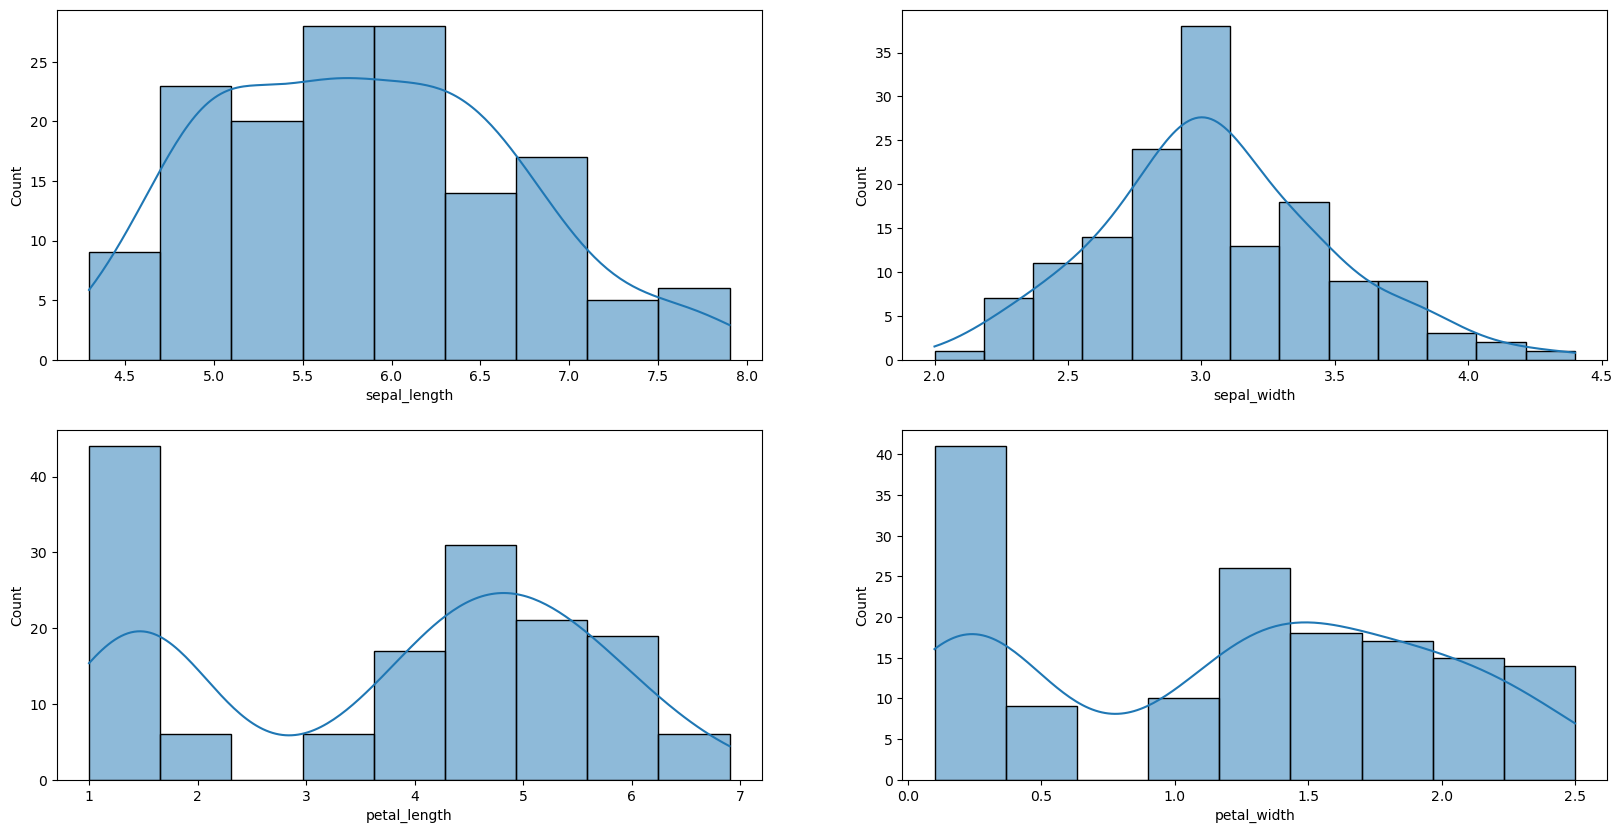

In [31]:
num_col = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.histplot(x= df[col], kde= True) #kernel density estimate
plt.show()

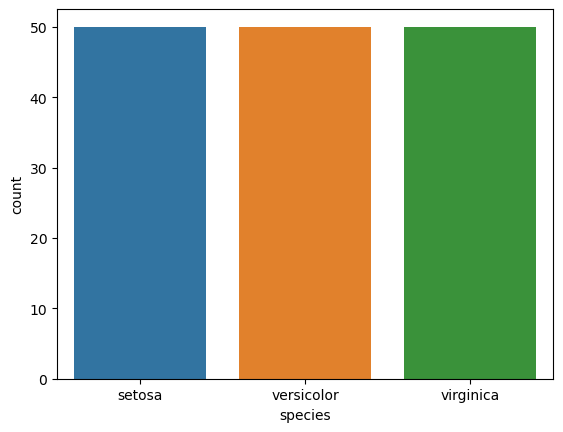

In [32]:
sns.countplot(x= df["species"])
plt.show()

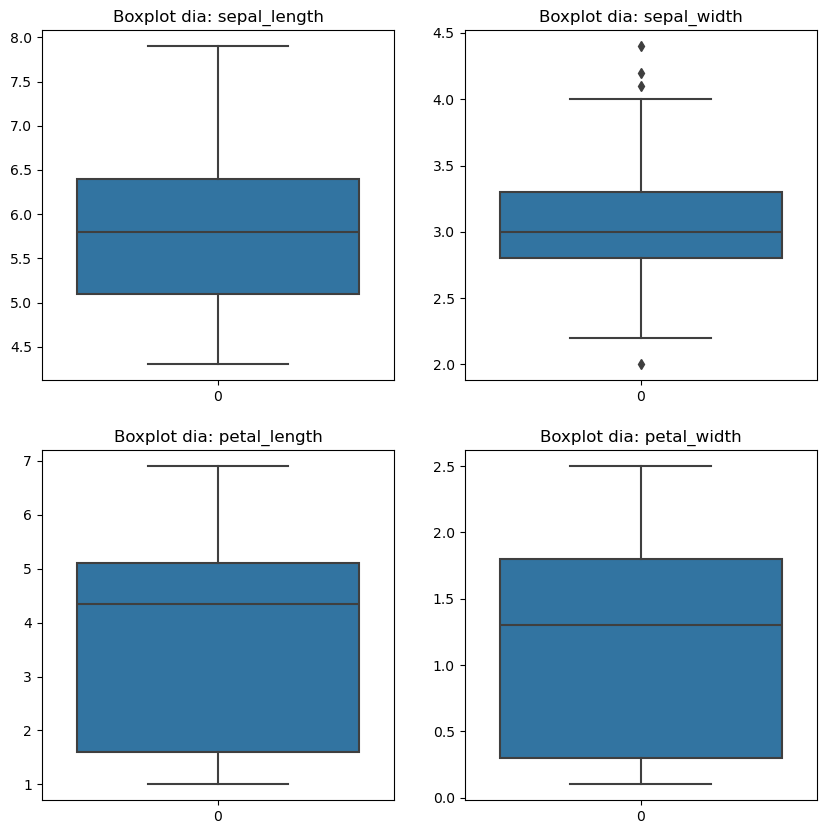

In [35]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.boxplot(data= df[col])
    plt.title(f"Boxplot dia: {col}")
plt.show()

In [37]:
outliers= df["sepal_width"]>4
outliers= outliers.add(df["sepal_width"]== 2)

df[outliers]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


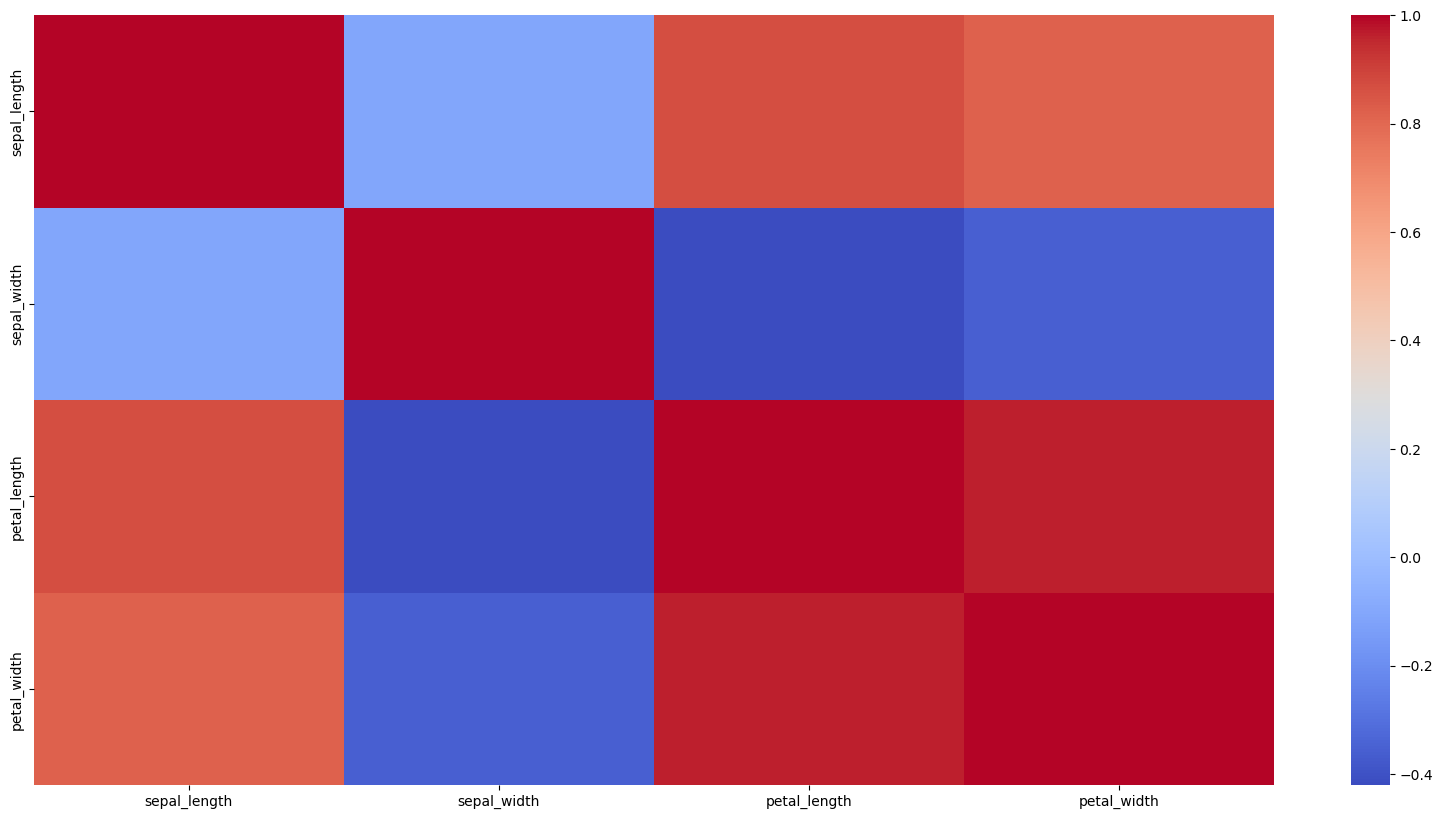

In [41]:
plt.figure(figsize= (20, 10))
sns.heatmap(data= df.drop(["species"], axis= 1).corr(), cmap= "coolwarm")
plt.show()

In [49]:
print(df['species'].unique())

['setosa' 'versicolor' 'virginica']


In [51]:
df['species'] = df['species'].replace( # Replace species names with numbers
    {'setosa': 0, 
     'versicolor': 1, 
     'virginica': 2})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [57]:
# Split Data
X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Model Training and Testing
from sklearn.svm import SVC

# Initialize the model
svc_model = SVC()

# Fit the model to training data
svc_model.fit(X_train, y_train)

SVC()

from sklearn.metrics import accuracy_score

In [61]:
from sklearn.metrics import accuracy_score
predict = svc_model.predict(X_test)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

# Assuming 'predict' and 'y_test' are defined
accuracy = accuracy_score(y_test, predict)
print(accuracy)

1.0


In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression()

In [65]:
LR.fit(X_train, y_train)

LogisticRegression()

In [67]:
lR_p=LR.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)